In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_teddynote import logging
logging.langsmith('test_node')

LangSmith 추적을 시작합니다.
[프로젝트명]
test_node


In [3]:
from langgraph.graph import StateGraph, START, END
from RAG.types import State

In [4]:
graph_builder = StateGraph(State)

In [5]:
from RAG.nodes.nodes import genesis_check, query_rewrite, vector_search, calculate_score,genesis_check_conditional,calculate_score_conditional


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

In [6]:
graph_builder.add_node("genesis_check", genesis_check)
graph_builder.add_node("vector_search", vector_search)
graph_builder.add_node("calculate_score", calculate_score)
graph_builder.add_node("query_rewrite", query_rewrite)

In [7]:
# START > chatbot
graph_builder.add_edge(START, "genesis_check")
graph_builder.add_edge('query_rewrite', "vector_search")
graph_builder.add_edge('vector_search', "calculate_score")
graph_builder.add_edge('query_rewrite', "vector_search")

In [8]:
graph_builder.add_conditional_edges(
    'genesis_check',
    genesis_check_conditional,
    path_map={"search": "vector_search", END: END},
)

graph_builder.add_conditional_edges(
    "calculate_score",
    calculate_score_conditional,
    path_map={"rewrite": "query_rewrite", END: END},
)

In [9]:
# 그래프 컴파일
graph = graph_builder.compile()

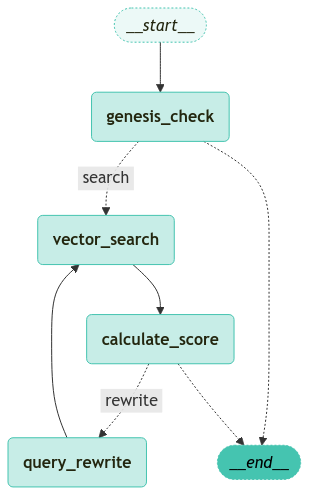

In [10]:
from langchain_teddynote.graphs import visualize_graph

# 그래프 시각화
visualize_graph(graph)

In [11]:
state: State = {
    "message":'엔진오일 교체?',
    "context": [],
    "answer": "",
    "change_count": 0,
    "is_valid_question": False,
    "is_pass": False,
    "previous_question": [],
    "best_answer": "",
    "best_score": 0,
}


res= graph.invoke(state)

판단 시작


You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


벡터 조회
Embeddings: {'dense': [array([-0.05930534, -0.00864981, -0.02001063, ...,  0.00549147,
       -0.02399952, -0.0019387 ], dtype=float32)], 'sparse': <Compressed Sparse Row sparse array of dtype 'float64'
	with 5 stored elements and shape (1, 250002)>}
Dense query dim: 1024 (1024,)
Sparse query dim: 250002 (250002,)
Connected to Milvus
점수 측정
점수: 100 


In [12]:
print(res['best_answer'])

### 질문에 대한 답변:  
엔진 오일 교체는 차량의 엔진을 최적의 상태로 유지하기 위해 매우 중요합니다. 엔진 오일은 윤활, 냉각, 세정 등의 역할을 하며, 시간이 지남에 따라 그 효과가 감소합니다. 따라서 정기적으로 엔진 오일과 필터를 교체해야 합니다.

1. **교체 주기**: 엔진 오일 및 필터는 매 10,000 km 또는 12개월마다 교체하는 것이 권장됩니다. 그러나 운전 성향이나 기후 조건에 따라 교체 주기를 조정해야 할 수 있습니다. 예를 들어, 고속주행이나 잦은 정지와 출발을 반복하는 경우, 오일 소모가 증가할 수 있습니다.

2. **오일 점검 및 보충**: 엔진 오일의 양은 정기적으로 점검해야 하며, 레벨 게이지를 사용하여 확인합니다. 오일 양이 L선 이하일 경우, 주입구를 열고 오일을 F선까지 보충해야 합니다. 오일을 보충할 때는 먼지 등이 들어가지 않도록 주의해야 합니다.

3. **오일 교체 방법**:
   - 차량을 평지에 주차하고 엔진을 예열합니다.
   - 시동을 끄고 엔진 후드를 열어 엔진 오일 주입구 캡과 레벨 게이지를 뽑습니다.
   - 오일 팬의 유면이 안정될 때까지 약 15분 기다립니다.
   - 오일을 교체한 후에는 엔진 오일 잔여 수명을 초기화해야 합니다.

4. **폐기물 처리**: 사용한 오일과 필터는 법적으로 정해진 방법으로 처리해야 하며, 반드시 직영 하이테크센터나 블루핸즈에서 교체하는 것이 좋습니다.

5. **주의사항**: 엔진 오일 첨가제를 사용하지 말고, 추천된 엔진 오일과 필터를 사용하는 것이 중요합니다. 품질이 부적합한 오일 필터를 사용하면 누유나 엔진 손상이 발생할 수 있습니다.

### 출처:  
1. CONTEXT 기반 정보: 엔진 오일 및 필터의 교체 주기, 점검 방법, 폐기물 처리 방법 등.
